#Import Library

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_csv('/Dataset/AutismSpectrumDisorder.csv')

#Data Understanding

In [6]:
dataset.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [8]:
dataset.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

# Data Preprocessing

## Memeriksa Missing Value

In [9]:
dataset.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

## Menghapus kolom yang tidak digunakan

In [21]:
dfAutism = dataset.drop(['ethnicity','contry_of_res','used_app_before','age_desc','relation'], axis='columns')

In [11]:
dfAutism

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,no,no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,no,yes,5,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,yes,yes,8,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,no,yes,6,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,no,no,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,f,no,no,7,YES
700,1,0,0,0,0,0,0,1,0,1,34,m,no,no,3,NO
701,1,0,1,1,1,0,1,1,0,1,24,f,no,no,7,YES
702,1,0,0,1,1,0,1,0,1,1,35,m,no,no,6,NO


In [22]:
print('Dataset memiliki {} baris data'.format(dfAutism.shape[0]))
print('Dataset terdiri dari {} kolom'.format(dfAutism.shape[1]))

Dataset memiliki 704 baris data
Dataset terdiri dari 16 kolom


In [23]:
for i in dfAutism.columns:
  print(i)

A1_Score
A2_Score
A3_Score
A4_Score
A5_Score
A6_Score
A7_Score
A8_Score
A9_Score
A10_Score
age
gender
jundice
austim
result
Class/ASD


## Memeriksa Data Duplikat

In [24]:
print("Jumlah data terduplikasi: ", dfAutism.duplicated().sum())

Jumlah data terduplikasi:  27


In [25]:
dfAutism = dfAutism.drop_duplicates()
print('Total menjadi {} baris data'.format(dfAutism.shape[0]))
print('Total menjadi {} kolom'.format(dfAutism.shape[1]))

Total menjadi 677 baris data
Total menjadi 16 kolom


## Data Transformation

In [16]:
dfAutism.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,no,no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,no,yes,5,NO


In [26]:
# label encode gender columns
dfAutism['gender'] = dfAutism['gender'].apply(lambda x: 1 if x == 'm' else 0)

In [27]:
# lowercase kolom `Class/ASD` terlebih dahulu
dfAutism['Class/ASD'] = dfAutism['Class/ASD'].str.lower()

# label encoding pada kolom binary
binary_map = {
    'no':0,
    'yes':1
}

binary_cols = ['jundice','austim','Class/ASD']

for col in binary_cols:
  dfAutism[col] = dfAutism[col].map(binary_map)

In [28]:
dfAutism.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,6,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,5,0


In [29]:
dfAutism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 703
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   A1_Score   677 non-null    int64 
 1   A2_Score   677 non-null    int64 
 2   A3_Score   677 non-null    int64 
 3   A4_Score   677 non-null    int64 
 4   A5_Score   677 non-null    int64 
 5   A6_Score   677 non-null    int64 
 6   A7_Score   677 non-null    int64 
 7   A8_Score   677 non-null    int64 
 8   A9_Score   677 non-null    int64 
 9   A10_Score  677 non-null    int64 
 10  age        677 non-null    object
 11  gender     677 non-null    int64 
 12  jundice    677 non-null    int64 
 13  austim     677 non-null    int64 
 14  result     677 non-null    int64 
 15  Class/ASD  677 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 89.9+ KB


## Kolom data `age` seharusnya bertipe numerik

In [30]:
dfAutism['age'] = dfAutism['age'].astype('Int64')

ValueError: invalid literal for int() with base 10: '?'

### Memeriksa elemen pada kolom `age`

In [32]:
ageColumn = dfAutism['age'].unique()

for i in ageColumn:
  print(i, end=" ")

26 24 27 35 40 36 17 64 29 33 18 31 30 34 38 42 43 48 37 55 50 53 20 28 21 383 47 32 44 ? 19 58 45 22 39 25 23 54 60 41 46 56 61 59 52 49 51 

In [33]:
# terdapat elemen `?` dan perlu merubah semua elemen selain numerik menjadi `NaN`
dfAutism['age'] = pd.to_numeric(dfAutism['age'], errors='coerce')

In [34]:
dfAutism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 703
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   677 non-null    int64  
 1   A2_Score   677 non-null    int64  
 2   A3_Score   677 non-null    int64  
 3   A4_Score   677 non-null    int64  
 4   A5_Score   677 non-null    int64  
 5   A6_Score   677 non-null    int64  
 6   A7_Score   677 non-null    int64  
 7   A8_Score   677 non-null    int64  
 8   A9_Score   677 non-null    int64  
 9   A10_Score  677 non-null    int64  
 10  age        675 non-null    float64
 11  gender     677 non-null    int64  
 12  jundice    677 non-null    int64  
 13  austim     677 non-null    int64  
 14  result     677 non-null    int64  
 15  Class/ASD  677 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 89.9 KB


In [35]:
dfAutism['age'] = dfAutism['age'].astype('Int64')

In [36]:
dfAutism.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 703
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   A1_Score   677 non-null    int64
 1   A2_Score   677 non-null    int64
 2   A3_Score   677 non-null    int64
 3   A4_Score   677 non-null    int64
 4   A5_Score   677 non-null    int64
 5   A6_Score   677 non-null    int64
 6   A7_Score   677 non-null    int64
 7   A8_Score   677 non-null    int64
 8   A9_Score   677 non-null    int64
 9   A10_Score  677 non-null    int64
 10  age        675 non-null    Int64
 11  gender     677 non-null    int64
 12  jundice    677 non-null    int64
 13  austim     677 non-null    int64
 14  result     677 non-null    int64
 15  Class/ASD  677 non-null    int64
dtypes: Int64(1), int64(15)
memory usage: 90.6 KB


In [37]:
#Periksa data Null
dfAutism.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          2
gender       0
jundice      0
austim       0
result       0
Class/ASD    0
dtype: int64

In [38]:
# Drop data Null
dfAutism = dfAutism.dropna()
dfAutism.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          0
gender       0
jundice      0
austim       0
result       0
Class/ASD    0
dtype: int64

In [39]:
dfAutism.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.0,675.000000,675.000000,675.000000,675.000000,675.000000
mean,0.720000,0.448889,0.456296,0.499259,0.502222,0.284444,0.419259,0.641481,0.321481,0.579259,29.748148,0.517037,0.099259,0.127407,4.872593,0.266667
std,0.449332,0.497750,0.498456,0.500370,0.500366,0.451484,0.493804,0.479921,0.467391,0.494044,16.727223,0.500080,0.299232,0.333676,2.457062,0.442545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.0,0.000000,0.000000,0.000000,3.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.0,1.000000,0.000000,0.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.0,1.000000,0.000000,0.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.0,1.000000,1.000000,1.000000,10.000000,1.000000


In [40]:
dfAutism.corr(method='pearson')

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
A1_Score,1.000000,-0.001061,0.061209,0.121159,0.164450,0.107949,0.215583,0.139256,0.146663,0.116828,0.022583,-0.074480,-0.013683,0.099749,0.394990,0.293976
A2_Score,-0.001061,1.000000,0.207759,0.153244,0.135983,0.177026,-0.054542,0.022553,0.188716,0.057224,0.014311,-0.051632,0.118785,0.066066,0.376808,0.297711
A3_Score,0.061209,0.207759,1.000000,0.405869,0.251725,0.253106,0.071539,0.008830,0.299213,0.148140,0.021989,-0.001473,0.063943,0.104892,0.539378,0.429567
A4_Score,0.121159,0.153244,0.405869,1.000000,0.294825,0.276773,0.136365,0.005071,0.308707,0.190796,0.019477,-0.060726,0.064902,0.187180,0.575563,0.456511
A5_Score,0.164450,0.135983,0.251725,0.294825,1.000000,0.384689,0.221403,0.102179,0.387104,0.249865,-0.040527,-0.031281,0.033207,0.078280,0.631388,0.526645
A6_Score,0.107949,0.177026,0.253106,0.276773,0.384689,1.000000,0.163061,0.094738,0.465983,0.277922,0.020109,-0.087210,0.076241,0.103782,0.621201,0.585150
A7_Score,0.215583,-0.054542,0.071539,0.136365,0.221403,0.163061,1.000000,0.084272,0.180129,0.243689,-0.037492,0.064159,0.029216,-0.018516,0.446405,0.343089
A8_Score,0.139256,0.022553,0.008830,0.005071,0.102179,0.094738,0.084272,1.000000,0.091269,0.107509,-0.083713,0.056398,0.010546,0.026244,0.322313,0.234256
A9_Score,0.146663,0.188716,0.299213,0.308707,0.387104,0.465983,0.180129,0.091269,1.000000,0.265370,0.040735,0.005097,0.057930,0.155568,0.650683,0.625010
A10_Score,0.116828,0.057224,0.148140,0.190796,0.249865,0.277922,0.243689,0.107509,0.265370,1.000000,-0.023075,-0.043007,0.052084,0.109655,0.525341,0.371423


# Proses Modeling SVM

In [41]:
# Membagi features dan target
x,y = dfAutism.drop('Class/ASD', axis=1), dfAutism['Class/ASD']

In [42]:
x.shape, y.shape

((675, 15), (675,))

In [43]:
#Inisialisasi K Fold
kFolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [44]:
for train_index, test_index in kFolds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [45]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((540, 15), (540,), (135, 15), (135,))

In [46]:
modelSVM = SVC(kernel='linear')

In [47]:
trainModelSVM = modelSVM.fit(x_train, y_train)

In [60]:
predictionModelSVM = modelSVM.predict(x_test)

In [61]:
conf_matrix = confusion_matrix(y_test, predictionModelSVM)
accu_score = accuracy_score(y_test, predictionModelSVM)
cls_report = classification_report(y_test, predictionModelSVM)

In [62]:
print(cls_report)
print("Nilai Akurasi model SVM : {:.2f}%".format(accu_score*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        36

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

Nilai Akurasi model SVM : 100.00%


In [63]:
class_names = ['Non ASD','ASD']

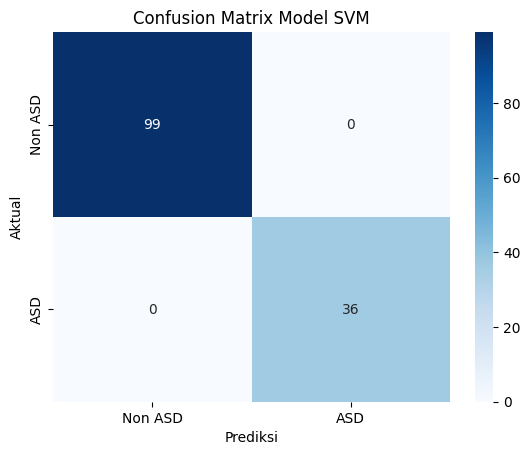

In [64]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Model SVM')
plt.show()

# Save dan Load Model

In [65]:
#Save Model
jb.dump(modelSVM, 'svm_modelAutism.joblib')

['svm_modelAutism.joblib']

In [66]:
#Load Model
model_Loaded = jb.load('svm_modelAutism.joblib')